In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import (RandomForestRegressor as RF,
                              GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [3]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [4]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Boston['medv'],
                                test_size=0.3,
                                random_state=0)

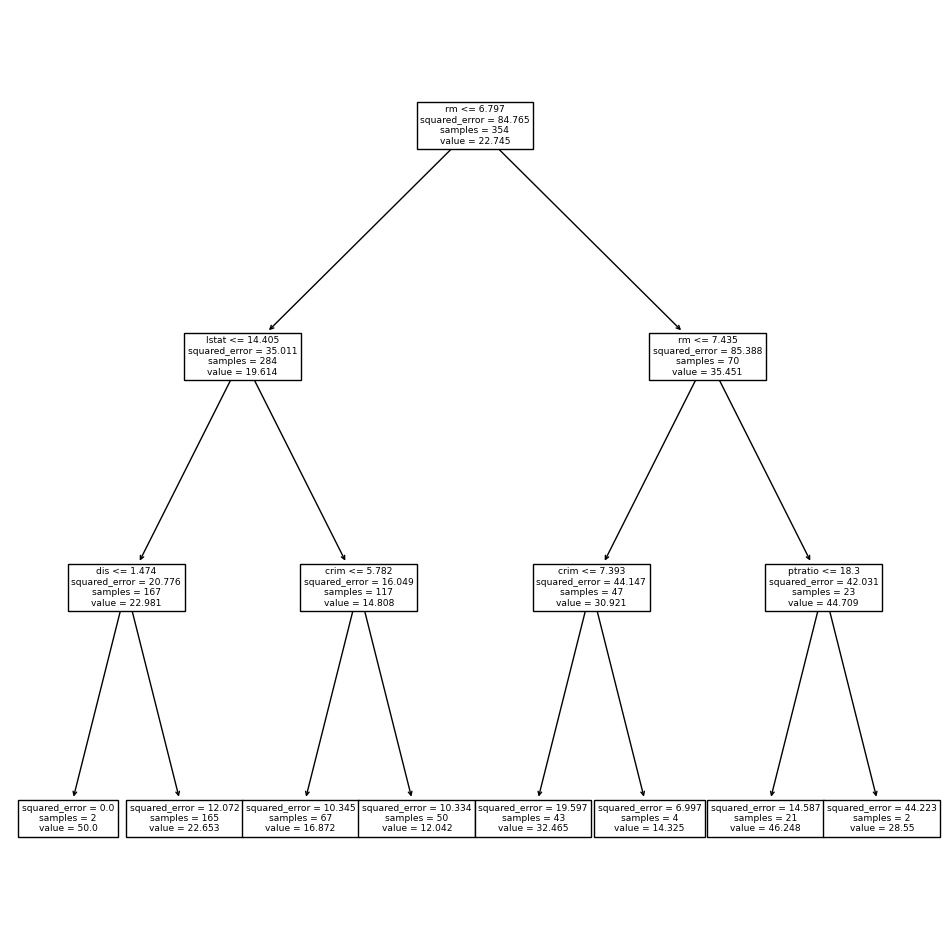

In [5]:
reg = DTR(max_depth =3)
reg.fit(X_train , y_train)
ax = subplots(figsize =(12 ,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

In [6]:
ccp_path = reg. cost_complexity_pruning_path (X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state =10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [7]:
best_ = grid.best_estimator_
np.mean(( y_test - best_.predict(X_test))**2)

28.069857549754044

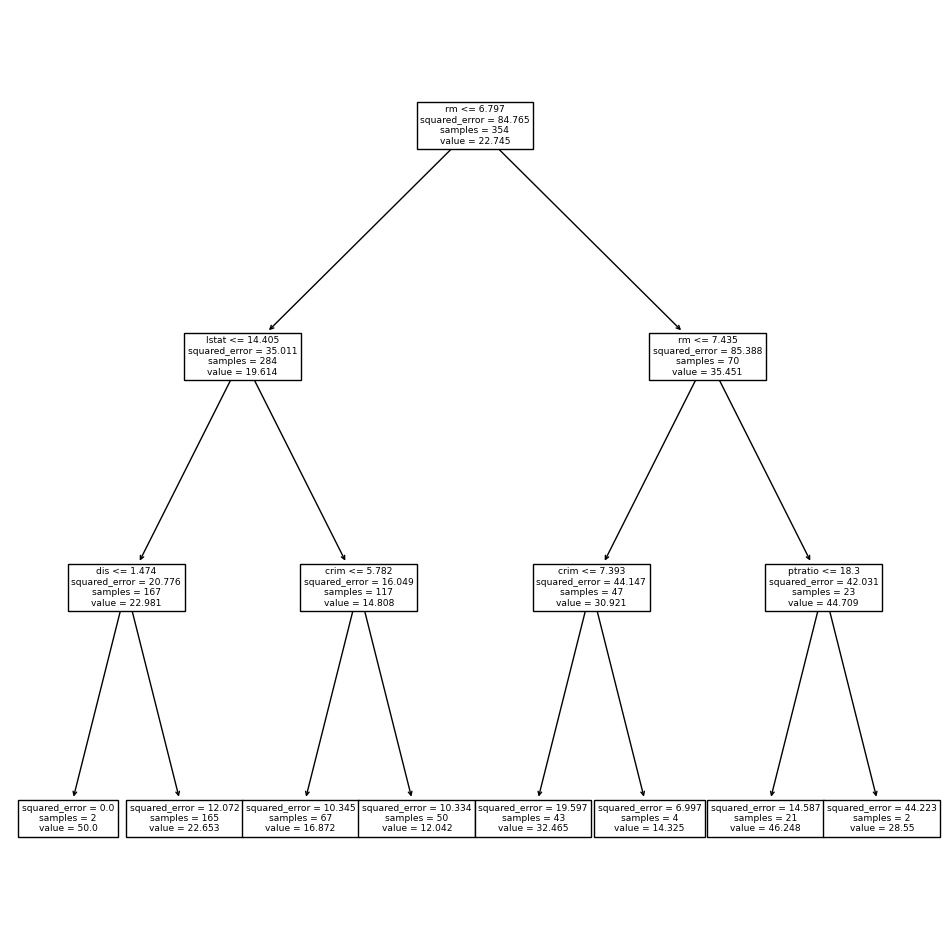

In [8]:
ax = subplots(figsize =(12 ,12))[1]
plot_tree(G.best_estimator_,
          feature_names=feature_names,
          ax=ax);

---